## Grids

### what is grid layout?
* A grid is a collection of horizontal and vertical lines creating a pattern against which we can line up our design elements
* They help us to create layouts in which our elements won't jump around or change width as we move from page to page, providing greater consistency on our websites
* A grid will typically have columns, rows, and then gaps between each row and column. The gaps are commonly referred to as gutters

### How to use Grid 
* define in the parent/container element the display property as grid
  + this will not change anything, just behave as the default block flow
  + we can add grid-gap: 1em; to introduce gaps between rows/blocks
  + before we define any grid rows, each block element will have a row
* we then define the space of each row by grid-template-rows
  + greid-template-rows: auto auto 1fr auto;
    + fr is the unit represents one fraction of the available space in the grid container
    + auto means enough space is assigned to accomodate their content
    + the above grid separate the space into 4 rows, the 1st, 2nd and last row's heights are defined by their content, the remaining space is assigned to the third row
* grid-template-area
  + define a name for each cell in the area in container/parent element
  + in each element css, define the grid-area by the name in container element
    + in the follow code, we define a layout, and another layout for screens wider than 40 em
  ```css
    
    body {
        grid-template-areas:
            'banner'
            'nav'
            'main'
            'footer'
            ;
    }

    @media (min-width: 40em){
      body {
        grid-template-areas:
          'banner banner'
          'nav main'
          'nav footer'
          ;
          
      }
    }
    
    header { grid-area: banner;}
    nav { grid-area: nav;}
    main { grid-area: main;}
    footer { grid-area: footer;}
  ```    
 
 * repeating track listings
   ```css

    .container {
        display: grid;
        grid-temlate-columns: repeat(3, 1fr);
        gap: 20px;
    }
  ```
  
### implicit and explicit gird
* if we only define grid-template-columns or grid-template-rows, the other dimension will implictedly extend based on explictly defined dimension
  + for example, if we only define 3 columns by grid-template-columns: repeat(3, 1fr); and we have 7 elements, then these elements will be arranged in 3 rows, two rows having 3 columns, and the last row contains one element
    + in addition, if you don't define any row based size, each row are auto sized, meaning their heights are determined by their contents. 
    + if you want to define the row height/size, you can use grid-auto-rows: 100px; then each rwo will be 100px tall

### minmax() function
* when you define a row height as 100px, you don't know if it is enough for the content. If not, then the content will overflow. To solve this, we use minmax(100px, auto) to make sure we will have a min of 100px, and use auto to accomodate the content
  ```css
    .container {
        display: grid;
        grid-template-colums: repeat(3, 1fr);
        grid-auto-rows: minmax(100px, auto);
        gap: 20px;
    }

  ```
  
### As many columns as will fit
* we can ask grid to create as many columns as will fit into the container by setting the value of grid-template-columns using repeat(auto-fill, minmax(200px, 1fr)), as shown in the following code example:
  ```css
    .container {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(200px, 1fr));
        grid-auto-rows: minmax(100px, auto);
        gap: 20px;
    }
  ```
  + This works because grid is creating as many 200-pixel columns as will fit into the container, then sharing whatever space is leftover among all the columns. The maximum is 1fr which, as we already know, distributes space evenly between tracks
  
### Line-based placement
* we can define the start and end columns/rows for each element using 
  + grid-column-start
  + grid-column-end
  + grid-row-start
  + grid-row-end
  + grid-row and grid-column, and specify the start and end separated by / (including start column/row, and exclude end)
    + for example, to expand the whole 12 columns, we use grid-colum 1/13
    ```css
      .container {
        display: grid;
        grid-template-columns: 1fr 3fr;
        gap: 20px;
      }
        
        // This is my lovely blog
        // expand the 2 columns(all 4 fractions)
        header {
          grid-column: 1 / 3;
          grid-row: 1;
        }

        // My article
        // occupy the 2nd row and 2nd column (expand 3 fractions in the 2nd row)
        article {
          grid-column: 2;
          grid-row: 2;
        }

        //Other things
        // occupy the 2nd row, and the 1st column (one fraction of the 2nd row)
        aside {
          grid-column: 1;
          grid-row: 2;
        }

        // contact me @example.com
        // the 3rd row and expand the two columns    
        footer {
          grid-column: 1 / 3;
          grid-row: 3;
        }
    ```
    
    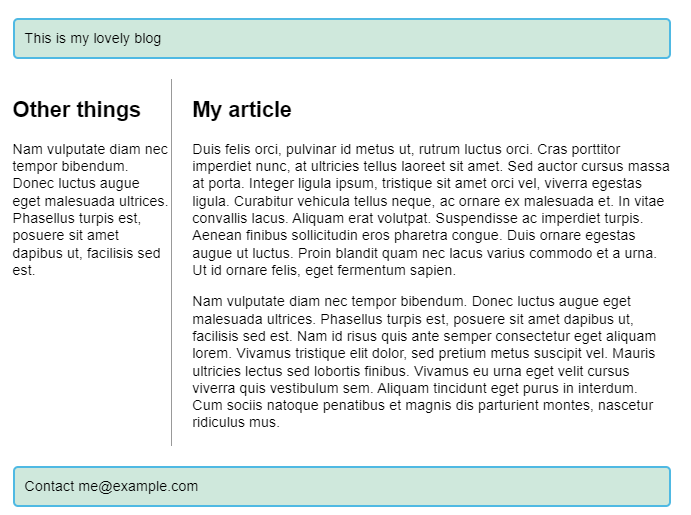


### Positioning with grid-template-areas
* we define marks/labels for each cell in the grid-template-areas in the parent/container, and for each individual HTML element selected by css selector, we assign the grid-area in its css definition
  + each element will expand all the cells with its mark (each element will have only one mark, but each mark can expand multiple cells in grid-template-areas in container)
* the following code will show the same layout as the previous one defined by line-based placement  

```css

    .container {
      display: grid;
      grid-template-areas:
        "header header"
        "sidebar content"
        "footer footer";
      grid-template-columns: 1fr 3fr;
      gap: 20px;
    }

    header {
      grid-area: header;
    }

    article {
      grid-area: content;
    }

    aside {
      grid-area: sidebar;
    }

    footer {
      grid-area: footer;
    }
```

#### Rules for grid-template-areas:
* You need to have every cell of the grid filled.
* To span across two cells, repeat the name.
* To leave a cell empty, use a . (period).
* Areas must be rectangular — for example, you can't have an L-shaped area.
* Areas can't be repeated in different locations.

### Grid frameworks in CSS Grid
* Grid "frameworks" tend to be based around 12 or 16-column grids. With CSS Grid, you don't need any third party tool to give you such a framework — it's already there in the spec

```css
<style>
        body {
            width: 90%;
            max-width: 900px;
            margin: 2em auto;
            font: .9em/1.2 Arial, Helvetica, sans-serif;
        }

        .container {
            display: grid;
            grid-template-columns: repeat(12, minmax(0,1fr));
            gap: 20px;
        }

        header,
        footer {
            border-radius: 5px;
            padding: 10px;
            background-color: rgb(207,232,220);
            border: 2px solid rgb(79,185,227);
        }

        aside {
            border-right: 1px solid #999;
        }

    </style>
    header {
      grid-column: 1 / 13;
      grid-row: 1;
    }

    article {
      grid-column: 4 / 13;
      grid-row: 2;
    }

    aside {
      grid-column: 1 / 4;
      grid-row: 2;
    }

    footer {
      grid-column: 1 / 13;
      grid-row: 3;
    }
  ```


## Flexbox
### Why Flexbox
* Problems of floats and positioning due to the difficulty to achieve the following design in convenient, flexible way:
  + Vertically centering a block of content inside its parent.
  + Making all the children of a container take up an equal amount of the available width/height, regardless of how much width/height is available.
  + Making all columns in a multiple-column layout adopt the same height even if they contain a different amount of content.
  
### Introducing a simple example
* define display: flex of the container/parent element will have multiple-column layout with eqaul-sized columns, and all columns are of the same height
  + the parent element will be treated as a block-level element and its childern are laid out as flex items
  + if you wish to lay out an element's children as flex items, but have that element as an inline element, use inline-flex
  
### The flex model
* The main axis is the axis running in the direction the flex items are laid out in (for example, as a row across the page, or a column down the page.) The start and end of this axis are called the main start and main end
* The corss axis is the axis running perpendicular to the direction the felx items are laid out in. The start and end of this aixs are called the cross start and cross end
* The parent element that has display: flex set on it is called the flex container
* The items laid out as flexible boxes inside the flex container are called flex items
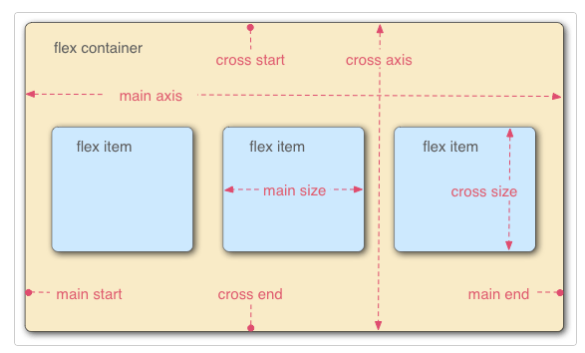
  

In [4]:
%%html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        /* add flex-wrap to wrap items in container */  
        flex-wrap: wrap;
      }

      article {
          /* define the width of each item as 200px */
          flex: 200px;
        
      }


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>

```html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        // add the flex-wrap in the container to wrap items
        flex-wrap: wrap;
      }

      article {
        // define the min width of each item
          flex: 200px;
        
      }


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>
```

### Flexible sizing of flex items
* you can define the relative size of each items in a rwo by flex property
   ```css
        article {
          flex: 1;
        }

        article:nth-of-type(3) {
          flex: 2;
        }    
    ```
    + what happen is that in each row, the width of the items will be assigned based on the relative fractions of flex preoperty
* you can also define the following css:
  ```css
      article {
      flex: 1 200px;
    }

    article:nth-of-type(3) {
      flex: 2 200px;
    }
  ```
  + this defines the following: Each flex item will first be given 200px of the available space. After that, the rest of the available space will be shared according to the proportion units
* The real value of flexbox can be seen in its flexibility/responsiveness 
  + If you resize the browser window or add another article element, the layout continues to work just fine 

In [8]:
%%html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        /* add flex-wrap to wrap items in container */  
        flex-wrap: wrap;
      }

      article {
  flex: 1 200px;
}

article:nth-of-type(3) {
  flex: 2 200px;
}


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>

### Columns or rows?
* Flexbox provides a property called flex-direction that specifies which direction the main axis runs (which direction the flexbox children are laid out in) 
* By default this is set to row, which causes the items to be laid out in a row
* you can set it to `flex-direction: column`; to arrange the items in column
* you can also set it to `flex-direction: row-reverse` and `flex-direction: column-reverse`

### Wrapping
* One issue that arises when you have a fixed width or height in your layout is that eventually your flexbox children will overflow their container, breaking the layout
  + in the following code, we have 12 articles, if we only define display:flex, then each article will share the width of the contaniner in one row, and each column/article will be very long
  + to solve this issue, we set flex-wrap: wrap in the container (section) so that the article items will be wrapped in the container
  + we also define the flex: 200px so that each item is at least 200px wide  
  + in a row, if there are fewer items, the width of each item will be adjusted to fill the entire row
* flex-flow shorthand
  + you can combine the flex-direction and flex-wrap in flex-flow
  `flex-flow: row wrap;` defines the flex-direction and flex-wrap at the same time

### Horizontal and vertical alignment
* first, define the align-items and justify-content property in the container element (here is div)
```css
    div {
      display: flex;
      align-items: center;
      justify-content: space-around;
    }
```
* align-items controls where the flex items sit on the cross axis
  + the default is stretch, which stretches all flex items to fill the parent in the direction of the cross axis. If the parent doesn't have a fixed height in the cross axis direction, then all flex items will become as tall as the tallest flex item. This is how our first example had columns of equal height by default.
  + The center value that we used in our above code causes the items to maintain their intrinsic dimensions, but be centered along the cross axis. This is why our current example's buttons are centered vertically
  + You can also have values like flex-start and flex-end, which will align all items at the start and end of the cross axis respectively
  + You can override the align-items behavior for individual flex items by applying the align-self property to them
  ```css
    button:first-child {
      align-self: flex-end;
    }
  ```
  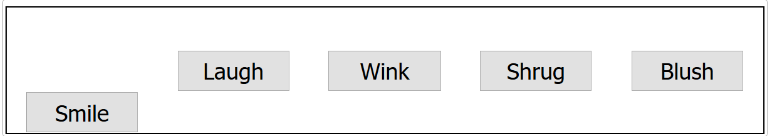

* justify-content controls where the flex items sit on the main axis
  + The default value is flex-start, which makes all the items sit at the start of the main axis
  + You can use flex-end to make them sit at the end
  + center is also a value for justify-content. It'll make the flex items sit in the center of the main axis
  + space-around distributes all the items evenly along the main axis with a bit of space left at either end
  + There is another value, space-between, which is very similar to space-around except that it doesn't leave any space at either end

### Ordering flex items
* you can control the order of the items without changing the source order by defining order property. For example, we can defin the button who is the first child of its parent to appear later than other items (the defualt order value is 0)
```css
    button:first-child {
      order: 1;
    }
```
* apply the following rules to order items:
  + By default, all flex items have an order value of 0.
  + Flex items with higher specified order values will appear later in the display order than items with lower order values.
  + Flex items with the same order value will appear in their source order. So if you have four items whose order values have been set as 2, 1, 1, and 0 respectively, their display order would be 4th, 2nd, 3rd, then 1st. The 3rd item appears after the 2nd because it has the same order value and is after it in the source order
  + You can set negative order values to make items appear earlier than items whose value is 0

### Nested flex boxes
* the following is an example of using nested flex boxes
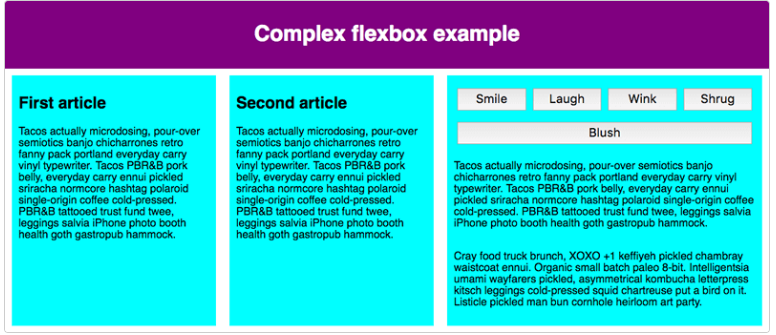

* the third article itself is a flex container with some buttons and text inside it with flex box layout
* the structure is the following:
  + section - article
              article
              article -div - button
                       div   button
                       div   button
                             button
                             button
* the following is how we define the css for this layout
  + the button will take as much space as it can with as many will fit on a line as is comfortable. Beyond that, they will drop to a new line
```css
  // define the layout for section (container for all elements)
    section {
      display: flex;
  }

  // define width for the first two articles
    article {
      flex: 1 200px;
    }

  // define the with and flex property for the 3rd article
  // its elements will have flex box layout with column flex dirction
    article:nth-of-type(3) {
      flex: 3 200px;
      display: flex;
      flex-flow: column;
    }

  // define button
      button {
      flex: 1 auto;
      margin: 5px;
      font-size: 18px;
      line-height: 1.5;
    }




## Floats
* floats was originally for floating images inside blocks of text and became one of the most commonly used tools for creating multiple column layouts on webpages
* was introduced to allow web developers to implement layouts involving an image floating inside a column of text, with the text wrapping around the left or right of it. The kind of thing you might get in a newspaper layout
* have commonly been used to create entire web site layouts featuring multiple columns of information floated so they sit alongside one another (the default behavior would be for the columns to sit below one another in the same order as they appear in the source)
* There are newer, better layout techniques available. Using floats in this way should be regarded as a legacy technique
* in the following example, box is a div element, and there are a set of p elements. At the begining, all these elements are block elements, so they will arrange in one column from the up to the bottom, as shown the following css (html code is shown in the attachment)
  ```css
    body {
      width: 90%;
      max-width: 900px;
      margin: 0 auto;
      font: 0.9em/1.2 Arial, Helvetica, sans-serif;
    }

    .box {
      width: 150px;
      height: 100px;
      border-radius: 5px;
      background-color: rgb(207, 232, 220);
      padding: 1em;
  ```  
  
* now we add the float and right margin properties to .box
  ```css
  .box {
      float: left;
      margin-right: 15px;
      width: 150px;
      height: 100px;
      border-radius: 5px;
      background-color: rgb(207, 232, 220);
      padding: 1em;
    }
  ```
  + The element with the float set on it (the div element with class of box) is taken out of the normal layout flow of the document and stuck to the left-hand side of its parent container (body element, in this case)
  + Any content that would come below the floated element in the normal layout flow will now wrap around it instead, filling up the space to the right-hand side of it as far up as the top of the floated element. There, it will stop
  + here we define margin-right property for the box to keep a space between the box and text
  + you can set float: right; and margin-left: 15px; to float box to the right side of the container
  + you can't set margin property of the text to maintain the space, since the box has been exculded from the flow, the text will just fill the space behind the box

* now we have the first two paragraphs to wrap around the box. If we only want the first paragraph to wrap around it, we need to tell the following elements (the second paragraph to clear the foating element)
  + to do this, we add a class of clear to the second paragraph, and set the clear css property to left to clear items floated to the left
    + clear can have left, right and both values
  + add a class "cleared" to the second paragraph, and set the css property 
  ```css
    .cleared {
        clear: left;
    }
  ```
  
### clearing boxes wrapped around a float  
* what if we want to clear from a box that containes/wraps around a float box with text wrapped around it? see the following code. div wrapper contains both the float box and the paragraph wrapped around it, and we want paragraph 2 to be cleared from the wrapper box
``` html
  <div class="wrapper">
  <div class="box">Float</div>

  <p>
    Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla luctus
    aliquam dolor, eu lacinia lorem placerat vulputate. Duis felis orci,
    pulvinar id metus ut, rutrum luctus orci. Cras porttitor imperdiet nunc, at
    ultricies tellus laoreet sit amet.
  </p>
  </div>
```

```css
    .wrapper {
      background-color: rgb(79, 185, 227);
      padding: 10px;
      color: #fff;
}
```

#### There are three ways to do this
* the clearfix hack 
  + add a psudo class/element after the wrapper class, and set clear: both to that element, as shown in the following css
  + define the css of psudo class of .wrapper::after as
  ```css
    .wrapper::after {
      content: "";
      clear: both;
      display: block;
    }
  ```
* use oveflow
  + set overflow property of the wrapper t a value other than visible
  ```css
    .wrapper {
      background-color: rgb(79, 185, 227);
      padding: 10px;
      color: #fff;
      overflow: auto;
    }
  ```
  + in certain cases you might find unwanted scrollbars or clipped shadows due to unintended consequences of using overflow

* display: flow-root  
  + set display: flow-root of the wrapper element
  ```css
    .wrapper {
      background-color: rgb(79, 185, 227);
      padding: 10px;
      color: #fff;
      display: flow-root;
    }
```
  + there will be no unintended consequences when you use  

## Positioning
* Positioning allows you to take elements out of normal document flow and make them behave differently, for example
  + by sitting on top of one another 
  + by always remaining in the same place inside the browser viewport
  + slightly alter the position of some boxes from their default flow position to give a slightly quirky, distressed feel
  + There are a number of different types of positioning that you can put into effect on HTML elements
  + To make a specific type of positioning active on an element, we use the position property

### Static positioning
* Static positioning is the default that every element gets
  + it just means to put the element into its normal position in the document flow — nothing special to see here
  
### Relative positioning
* very similar to static positioning, except that once the positioned element has taken its place in the normal flow, you can then modify its final position, including making it overlap other elements on the page
* to do this, we first set the position to relative, and then use top, bottom, left and right properties to adjust its position relative to its normal flow position, as shown below
   ```css  
    .positioned {
          position: relative;
          background: yellow;
          padding: 10px;  
          top: 30px;
          left: 30px;
        }   
   ```
  + note that top and left defines how far it goes from top left corner. Therefore, the element will go down and right
  + in addition, the other elements don't change their positions, only the element with relative positioning changes its position 
  + ![image.png](attachment:image.png)

### Absolute positioning
* An absolutely positioned element no longer exists in the normal document flow. Instead, it sits on its own layer separate from everything else
* we can create isolated UI features that don't interfere with the layout of other elements on the page
  + For example, popup information boxes, control menus, rollover panels, UI features that can be dragged and dropped anywhere on the page, and so on
* we control the position using top, bottom, left and right to control how far the element is from its parent/container element. This is different from relative positioning
  + you can using top, bottom, left, and right to control the size of the elements. using top: 0; bottom: 0; left: 0; right: 0; and margin: 0; will make the element occupy the entire container space

#### positioning contexts of absolute positioning
* which element is the containing element of an absolutely positioned element depends on the position property of the ancestors of the positioned element
  + if no ancestor elements have their position property explicitly defined, then by default all ancestor elements will have a static position. The result of this is the absolutely positioned element will be contained in the initial containing block
    + The initial containing block has the dimensions of the viewport and is also the block that contains the html element
    + In other words, the absolutely positioned element will be displayed outside of the html element and be positioned relative to the initial viewport, or is parallel to html element
    
* We can change the positioning context, that is, which element the absolutely positioned element is positioned relative to   
  + This is done by setting positioning on one of the element's ancestors
  + we can add the position: relative to the body element, which is an ancestor of the p element
  
#### Z-index
* when two elements are overlapped, the later one defined in the source order will stack over the previous one
* the stack order can be changed using z-index property
* "z-index" is a reference to the z-axis
  + positive values move them higher up the stack
  + negative values move them lower down the stack
  + By default, positioned elements all have a z-index of auto, which is effectively 0

#### HTML and CSS code for absolute positioning
  ```html
    <!DOCTYPE html>
        <html lang="en-us">
          <head>
            <meta charset="utf-8">
            <meta name="viewport" content="width=device-width">
            <title>Basic document flow</title>

            <style>
              body {
              width: 500px;
              position: relative
              margin: 0 auto;
            }

            .positioned {
             position: absolute;
             background: yellow;
             top: 30px;
             left: 30px;

              }


            p:nth-of-type(1) {
          margin-top: 60px;
        }



              p {
                background: aqua;
                border: 3px solid blue;
                padding: 10px;
                margin: 10px;
              }

              span {
                background: red;
                border: 1px solid black;
              }
            </style>
          </head>
          <body>
            <h1>Basic document flow</h1>

            <p>I am a basic block level element. My adjacent block level elements sit on new lines below me.</p>

            <p class="positioned">By default we span 100% of the width of our parent element, and our height is as tall as our child content. Our total width and height is our content + padding + border width/height.</p>

            <p>We are separated by our margins. Because of margin collapsing, we are separated by the width of one of our margins, not both.</p>

            <p>inline elements <span>like this one</span> and <span>this one</span> sit on the same line as one another, and adjacent text nodes, if there is space on the same line. Overflowing inline elements <span>wrap onto a new line if possible — like this one containing text</span>, or just go on to a new line if not, much like this image will do: <img src="long.jpg" alt="a wide but short section of a photo of several fabrics"></p>

          </body>
        </html>
  ```

### Fixed positioning
* works similar to absolute positioning, but usually fixes an element in place relative to the visible portion of the viewport
  + An exception to this occurs if one of the element's ancestors is a fixed containing block because its transform property has a value other than none
  +  you can create useful UI items that are fixed in place, like persistent navigation menus that are always visible no matter how much the page scrolls
* in the following example, 
  + we first define the body element to have a fixed height so that we can scroll up and down due to its limited height
  + based on this fixed containing block, we define h1 element, which is inside the body element. h1 element has a fixed position at top 0, which fixes it to the top of the body contaniner
    + h1 element also has the same width as the body container to block everything scrolled up behind it
  + note that now h1 element as a fixed positioning element, is out of the block flow, and all the other elements will fill in its space. To make the first paragraph to be visible, we add a margin of 60px to that element to make it initially visible
  + now whe we scroll up and down the page, the elements will be visible or not visible, depending on their relative position to h1, and h1 is always positioned to the top of the web page
  

  
  ```html

        <!DOCTYPE html>
        <html lang="en-us">
          <head>
            <meta charset="utf-8">
            <meta name="viewport" content="width=device-width">
            <title>Basic document flow</title>

            <style>
              body {
              width: 500px;
              height: 1400px; 
              margin: 0 auto;
            }

            h1 {
              position: fixed;
              top: 0;
              width: 500px;
              margin-top: 0;
              background: white;
              padding: 10px;
            }

            p:nth-of-type(1) {
          margin-top: 60px;
        }



              p {
                background: aqua;
                border: 3px solid blue;
                padding: 10px;
                margin: 10px;
              }

              span {
                background: red;
                border: 1px solid black;
              }
            </style>
          </head>
          <body>
            <h1>Basic document flow</h1>

            <p>I am a basic block level element. My adjacent block level elements sit on new lines below me.</p>

            <p>By default we span 100% of the width of our parent element, and our height is as tall as our child content. Our total width and height is our content + padding + border width/height.</p>

            <p>We are separated by our margins. Because of margin collapsing, we are separated by the width of one of our margins, not both.</p>

            <p>inline elements <span>like this one</span> and <span>this one</span> sit on the same line as one another, and adjacent text nodes, if there is space on the same line. Overflowing inline elements <span>wrap onto a new line if possible — like this one containing text</span>, or just go on to a new line if not, much like this image will do: <img src="long.jpg" alt="a wide but short section of a photo of several fabrics"></p>

          </body>
        </html>
   ```

## Sticky positioning
* allows a positioned element to act like it's relatively positioned until it's scrolled to a certain threshold (e.g., 10px from the top of the viewport), after which it becomes fixed
* Sticky positioning can be used, for example, to cause a navigation bar to scroll with the page until a certain point and then stick to the top of the page
  + here the top and left are used to define the position relative to its container with a scrolling mechanism, such as a fixed height
  ```css

    body {
         width: 500px;
         height: 1400px;
         position: relative
         margin: 0 auto;
    }

    .positioned {
     position: sticky;
     top: 50px;
     left: 30px;
     color: yellow;
    }
  ```
  
* another common use case 
  + create a scrolling index page where different headings stick to the top of the page as they reach it
  + In normal flow the dt elements will scroll with the content. 
  + since dt element defined position: sticky, along with a top value of 0, it will stick to the top of the viewport as it reaches that position. 
  + Each subsequent header will then replace the previous one as it scrolls up to that position
* HTML and CSS code is shown below: 

   ```html

        <!DOCTYPE html>
        <html lang="en-us">
          <head>
            <meta charset="utf-8">
            <meta name="viewport" content="width=device-width">
            <title>Basic document flow</title>

            <style>
              body {
              width: 500px;
              height: 1400px;
              position: relative
              margin: 0 auto;
            }

             dt {
              background-color: black;
              color: white;
              padding: 10px;
              position: sticky;
              top: 0;
              left: 0;
              margin: 1em 0;
            }         
            </style>
          </head>           
            
          <body>
            <h1>Sticky positioning</h1>
            <dl>
              <dt>A</dt>
              <dd>Apple</dd>
              <dd>Ant</dd>
              <dd>Altimeter</dd>
              <dd>Airplane</dd>
              <dt>B</dt>
              <dd>Bird</dd>
              <dd>Buzzard</dd>
              <dd>Bee</dd>
              <dd>Banana</dd>
              <dd>Beanstalk</dd>
              <dt>C</dt>
              <dd>Calculator</dd>
              <dd>Cane</dd>
              <dd>Camera</dd>
              <dd>Camel</dd>
              <dt>D</dt>
              <dd>Duck</dd>
              <dd>Dime</dd>
              <dd>Dipstick</dd>
              <dd>Drone</dd>
              <dt>E</dt>
              <dd>Egg</dd>
              <dd>Elephant</dd>
              <dd>Egret</dd>
            </dl>
          </body>
        </html>
     ```